# Part 1:

In [2]:
# Loader la data

import pandas as pd
import statsmodels.formula.api as smf

df = pd.read_csv('advertising.csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [4]:
# Description de la data

df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


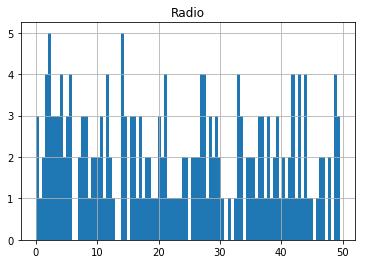

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1)
df['Radio'].hist(bins = 100)
plt.title('Radio')
plt.show()

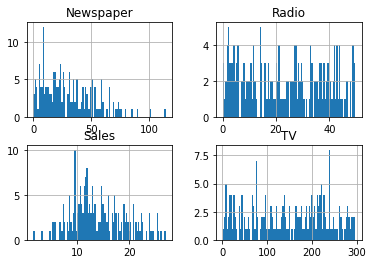

In [6]:
# La distribution des variables (Histogrammes)

df.hist(bins = 100)
plt.show()

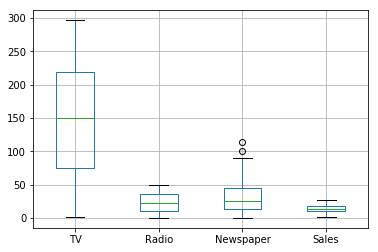

In [7]:
# Détection des outliers (Boxplots)

df.boxplot()

In [8]:
# Détecter les excates outliers

import numpy as np

np.percentile(df.Newspaper, 99.5)

100.96549999999995

In [9]:
# Supprimer les outliers

condition = df['Newspaper'] < 100
df[condition].shape

(198, 4)

In [10]:
df = df[condition]

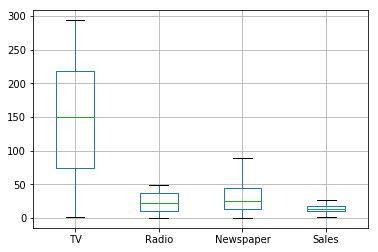

In [11]:
# Vérification:

df.boxplot()

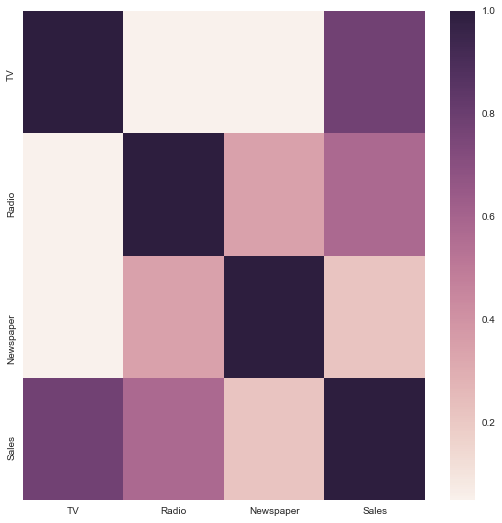

In [12]:
# Corrélation

import seaborn as sns
corr = df.corr()
fig, ax = plt.subplots(1,1, figsize = (9,9))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

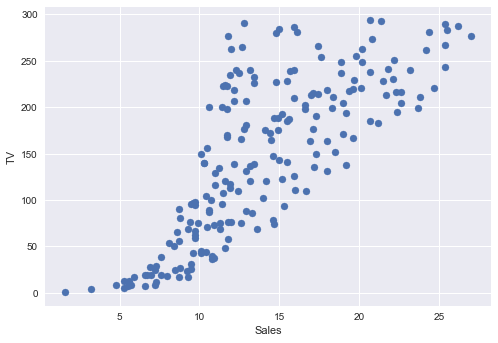

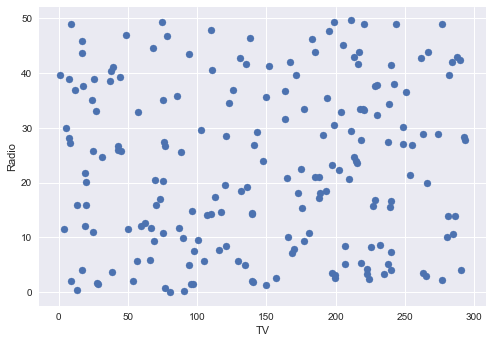

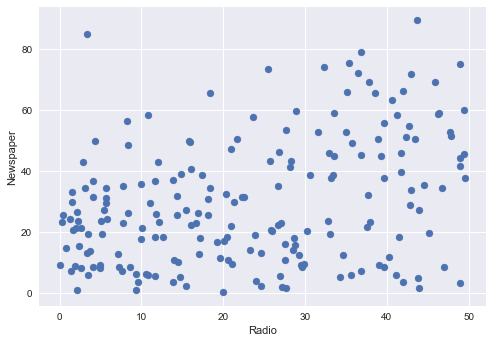

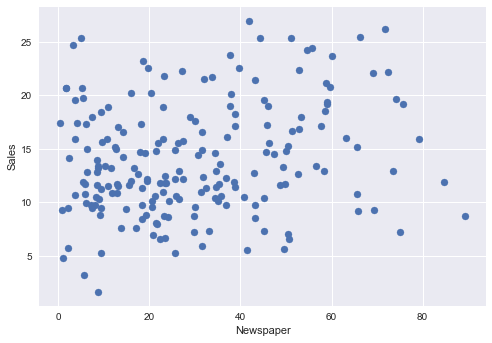

In [13]:
# Scatterplot de chaque couple de variables

for i in range (-1,3):
    figure = plt.figure()
    plt.scatter(df.iloc[:,i], df.iloc[:,i+1])
    plt.xlabel('{}'.format(df.columns[i]))
    plt.ylabel('{}'.format(df.columns[i+1]))    
    

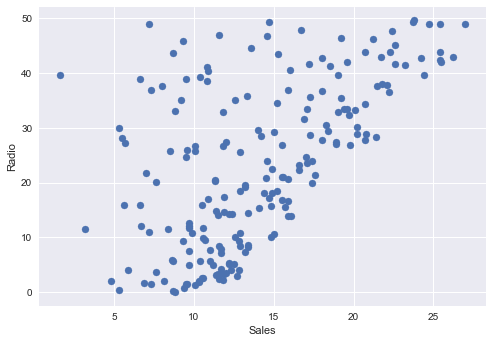

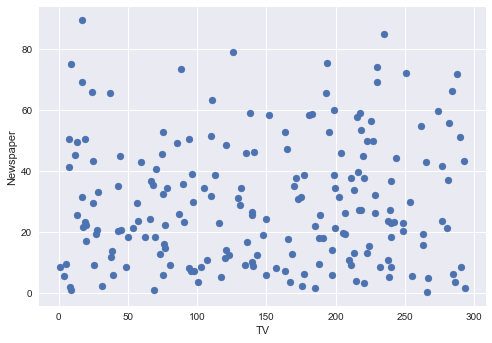

In [14]:
for i in range (-1,1):
    figure = plt.figure()
    plt.scatter(df.iloc[:,i], df.iloc[:,i+2])
    plt.xlabel('{}'.format(df.columns[i]))
    plt.ylabel('{}'.format(df.columns[i+2]))

In [15]:
# Part 2:

In [16]:
# Linear Regression pour les 3 variables:

lm = smf.ols(formula='Sales ~ Radio ', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     97.69
Date:                Mon, 22 Oct 2018   Prob (F-statistic):           5.99e-19
Time:                        16:15:48   Log-Likelihood:                -566.70
No. Observations:                 198   AIC:                             1137.
Df Residuals:                     196   BIC:                             1144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3166      0.560     16.622      0.000       8.211      10.422
Radio          0.2016      0.020      9.884      0.000       0.161       0.242
==============================================================================
Omnibus:                       20.193   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.115
Skew:                          -0.785   Prob(JB):                     9.56e-06
Kurtosis:                       3.582   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
lm.pvalues

Intercept    2.738220e-39
Radio        5.989743e-19
dtype: float64

In [18]:
lm_2 = smf.ols(formula='Sales ~ TV ', data=df).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     302.8
Date:                Mon, 22 Oct 2018   Prob (F-statistic):           1.29e-41
Time:                        16:15:52   Log-Likelihood:                -514.27
No. Observations:                 198   AIC:                             1033.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0306      0.462     15.219      0.000       6.120       7.942
TV             0.0474      0.003     17.400      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.551
Skew:                          -0.062   Prob(JB):                        0.759
Kurtosis:                       2.774   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
lm_3 = smf.ols(formula='Sales ~ Newspaper ', data=df).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.927
Date:                Mon, 22 Oct 2018   Prob (F-statistic):            0.00188
Time:                        16:15:56   Log-Likelihood:                -601.84
No. Observations:                 198   AIC:                             1208.
Df Residuals:                     196   BIC:                             1214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3193      0.639     19.274      0.000      11.059      13.580
Newspaper      0.0558      0.018      3.151      0.002       0.021       0.091
==============================================================================
Omnibus:                        5.835   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.303
Skew:                           0.333   Prob(JB):                       0.0706
Kurtosis:                       2.555   Cond. No.                         63.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Le coefficient de la regression Sales ~ Radio est plus grand que le coefficient de la regression Sales ~ TV
# alors que TV est plus corrélé à Sales que Radio, ceci revient au fait que les 2 variables TV et Radio ne sont pas
# normées de la même façon !

In [21]:
# calcul de la MSE

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df.Sales, lm.fittedvalues)
mse

17.92739240698973

In [22]:
mse_2 = mean_squared_error(df.Sales, lm_2.fittedvalues)
mse_2

10.556397575263253

In [23]:
mse_3 = mean_squared_error(df.Sales, lm_3.fittedvalues)
mse_3

25.56815191417739

In [24]:
df.describe()

,TV,Radio,Newspaper,Sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,13.980808
std,85.443221,14.862111,20.446303,5.196097
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.325000,44.050000,17.375000
max,293.600000,49.600000,89.400000,27.000000


In [89]:
# Normalisation des variables:
# modifier les données pour que le coefficient de la regression linéaire 
# reflete l'importance de la variable par rapport aux autres.

df['TV'] = df['TV']/df.TV.max()
df['Radio'] = df['Radio']/df.Radio.max()
df['Newspaper'] = df['Newspaper']/df.Newspaper.max()

C:\Users\ASUS N752V\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ASUS N752V\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ASUS N752V\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [90]:
df

,TV,Radio,Newspaper,Sales
0,0.783719,0.762097,0.774049,22.1
1,0.151567,0.792339,0.504474,10.4
2,0.058583,0.925403,0.775168,9.3
3,0.516008,0.832661,0.654362,18.5
4,0.615804,0.217742,0.653244,12.9
5,0.029632,0.985887,0.838926,7.2
6,0.195845,0.661290,0.262864,11.8
7,0.409401,0.395161,0.129754,13.2
8,0.029292,0.042339,0.011186,4.8
9,0.680518,0.052419,0.237136,10.6


In [91]:
lm = smf.ols(formula='Sales ~ Radio ', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     97.69
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           5.99e-19
Time:                        16:15:16   Log-Likelihood:                -566.70
No. Observations:                 198   AIC:                             1137.
Df Residuals:                     196   BIC:                             1144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3166      0.560     16.622      0.000       8.211      10.422
Radio         10.0015      1.012      9.884      0.000       8.006      11.997
==============================================================================
Omnibus:                       20.193   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.115
Skew:                          -0.785   Prob(JB):                     9.56e-06
Kurtosis:                       3.582   Cond. No.                         4.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
lm_2 = smf.ols(formula='Sales ~ TV ', data=df).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     302.8
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           1.29e-41
Time:                        16:15:35   Log-Likelihood:                -514.27
No. Observations:                 198   AIC:                             1033.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0306      0.462     15.219      0.000       6.120       7.942
TV            13.9111      0.799     17.400      0.000      12.334      15.488
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.551
Skew:                          -0.062   Prob(JB):                        0.759
Kurtosis:                       2.774   Cond. No.                         4.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
lm_3 = smf.ols(formula='Sales ~ Newspaper ', data=df).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.927
Date:                Wed, 26 Sep 2018   Prob (F-statistic):            0.00188
Time:                        16:15:57   Log-Likelihood:                -601.84
No. Observations:                 198   AIC:                             1208.
Df Residuals:                     196   BIC:                             1214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3193      0.639     19.274      0.000      11.059      13.580
Newspaper      4.9882      1.583      3.151      0.002       1.866       8.111
==============================================================================
Omnibus:                        5.835   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.303
Skew:                           0.333   Prob(JB):                       0.0706
Kurtosis:                       2.555   Cond. No.                         4.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Dans le modèle Sales~TV, l'intercept représente le gain même sans dépenser de l'argent à la publicité télévisée.

# Part 3

In [94]:
# modele multi variables

lm_4 = smf.ols(formula='Sales ~ Radio + TV + Newspaper', data=df).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           8.35e-95
Time:                        16:18:24   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000       2.325       3.580
Radio          9.3521      0.430     21.772      0.000       8.505      10.199
TV            13.4147      0.415     32.293      0.000      12.595      14.234
Newspaper     -0.1053      0.563     -0.187      0.852      -1.215       1.005
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         6.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Si on augmente de 50 les sommes allouées au média TV, les ventes augmentent de 50 fois le coef de TV dans le modèle.

In [ ]:
# Le coef de la variable Newspaper est presuqe nul vu que cette dernière n'est pas une variable significative.
# Le coef de la variable Newspaper est devenue négatif, parce qu'elle diminue les ventes quand elle est incluse dans 
# le même modèle avec TV et Radio

In [95]:
# Le modèle sans Newspaper:

lm_5 = smf.ols(formula='Sales ~ Radio + TV', data=df).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     834.4
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           2.60e-96
Time:                        16:24:40   Log-Likelihood:                -383.26
No. Observations:                 198   AIC:                             772.5
Df Residuals:                     195   BIC:                             782.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9315      0.297      9.861      0.000       2.345       3.518
Radio          9.3244      0.402     23.182      0.000       8.531      10.118
TV            13.4120      0.414     32.385      0.000      12.595      14.229
==============================================================================
Omnibus:                       59.228   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.127
Skew:                          -1.321   Prob(JB):                     3.06e-32
Kurtosis:                       6.257   Cond. No.                         4.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
mse_4 = mean_squared_error(df.Sales, lm_4.fittedvalues)
mse_5 = mean_squared_error(df.Sales, lm_5.fittedvalues)
print(mse_4)
print(mse_5)

2.8100991768174137
2.8106062513305865


In [ ]:
# Même si on a enlevé la variable Newspaper le modèle ne s'améliore pas, il est pratiquement le même.

In [96]:
# Part 4:

In [98]:
# Ajouter la nouvelle variable tv_radio:

df['TV_Radio'] = df.TV * df.Radio

C:\Users\ASUS N752V\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
df

,TV,Radio,Newspaper,Sales,TV_Radio
0,0.783719,0.762097,0.774049,22.1,0.597270
1,0.151567,0.792339,0.504474,10.4,0.120092
2,0.058583,0.925403,0.775168,9.3,0.054213
3,0.516008,0.832661,0.654362,18.5,0.429660
4,0.615804,0.217742,0.653244,12.9,0.134086
5,0.029632,0.985887,0.838926,7.2,0.029214
6,0.195845,0.661290,0.262864,11.8,0.129510
7,0.409401,0.395161,0.129754,13.2,0.161779
8,0.029292,0.042339,0.011186,4.8,0.001240
9,0.680518,0.052419,0.237136,10.6,0.035672


In [100]:
# Rajoutez au modèle la variable multiplicative:

lm_6 = smf.ols(formula='Sales ~ Radio + TV + TV_Radio', data=df).fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1934.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          3.19e-144
Time:                        16:41:33   Log-Likelihood:                -267.07
No. Observations:                 198   AIC:                             542.1
Df Residuals:                     194   BIC:                             555.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7577      0.247     27.304      0.000       6.270       7.246
Radio          1.3688      0.443      3.089      0.002       0.495       2.243
TV             5.5919      0.441     12.682      0.000       4.722       6.462
TV_Radio      15.9617      0.767     20.817      0.000      14.449      17.474
==============================================================================
Omnibus:                      126.182   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.060
Skew:                          -2.306   Prob(JB):                    1.12e-250
Kurtosis:                      13.875   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# On peut expliquer que cette variable ait une grande influence sur le modèle par le fait d'investir sur les deux à la fois
# et en même temps est mieux qu'investir sur l'un des deux ou les deux séparément.

# C'est à dire si la personne voit la publication à la fois à la télé et au radio, ceci augmente les chances de ventes.